# Initialise 

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

In [2]:
# %load_ext autoreload
# %autoreload 2
import c14
from c14 import livermodels as lm



In [3]:
data = pd.read_csv('../../../results/C14data_liver_samples_20190502.csv')
c14_patient_data = data.groupby(['type', 'sample', 'ploidy', 'pathology']).mean().dropna(how='all').reset_index()
c14_patient_data['age'] = c14_patient_data.Dcoll - c14_patient_data.Dbirth 
# c14_patient_data['e14C'] = c14_patient_data.error_measurement
data = c14_patient_data.query('type == "hepatocyte" and pathology != "Y"')
edata = c14.exp_data(data)

In [4]:
m  = lm.Pl40d4b()

In [5]:
op = c14.optimize(model=m,data=edata,step_size=2)
vis= c14.visualisze(model=m,data=edata)
warnings.filterwarnings("ignore")

In [ ]:
res = op.optimize_minuit_multistart(mode='mcmc',steps=100,nwalkers=100,processes=2)

64 parameters sets left starting minuit


In [ ]:
pe = res.sort_values('fval').iloc[0]['values']
cov = res.sort_values('fval').iloc[0]['cov']

In [ ]:
errors = vis.calc_error(pe,cov)

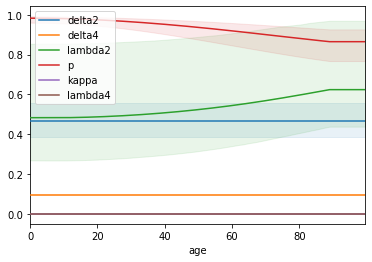

In [11]:
vis.plot_parameter(pe,errors,log=False)
plt.legend()
plt.show()

In [12]:
op.calc_aicc(pe)

-180.24250268345642